In [1]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm
import seaborn as sns
sns.set_style("whitegrid")

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time
import random
import graphviz as gv


# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Charger les données
file_path = "../../data/Loan_Data_Preprocessed.csv"
df = pd.read_csv(file_path)

In [3]:
#  Séparer les features et la cible
X = df.drop(columns=['customer_id', 'default'])  # Exclure l'ID client et la cible
y = df['default']

# Définition de variables
X_noms = X.columns

# Conversion en np.ndarray
X = np.array(X)
y = np.array(y)

# Définition de variables
dim = len(X[0])
nb_labels = len(np.unique(y))

In [4]:
# -----
# Définition des données d'apprentissage (on reprend les données data_gauss générées plus haut)
np.random.seed(42)
(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(X, y,100)

data_train = train_desc
label_train = train_label
data_test = test_desc
label_test = test_label


index = random.sample(range(len(X)),7000)
data_cv, label_cv = X[index], y[index]

# Decision Tree

In [5]:
# Initialiation d'un arbre pour le dataset Iris:
arbre = classif.ClassifierArbreNumerique(dim, 0.0, X_noms)

# Construction de l'arbre de décision à partir du dataset Iris
arbre.train(X,y)

# Construction de la représentation graphique (affichage)
graphe_arbre = gv.Digraph(format='png')
arbre.affiche(graphe_arbre)

# Affichage du graphe obtenu:
print("Cet arbre possède ",arbre.number_leaves()," feuilles.")
# graphe_arbre


Cet arbre possède  54  feuilles.


In [6]:
# mesure du taux de bonne classification
arbre.accuracy(data_test,label_test)
print("Accuracy finale (train): ", arbre.accuracy(data_train,label_train))
print("Accuracy finale (test) : ", arbre.accuracy(data_test,label_test))

Accuracy finale (train):  1.0
Accuracy finale (test) :  1.0


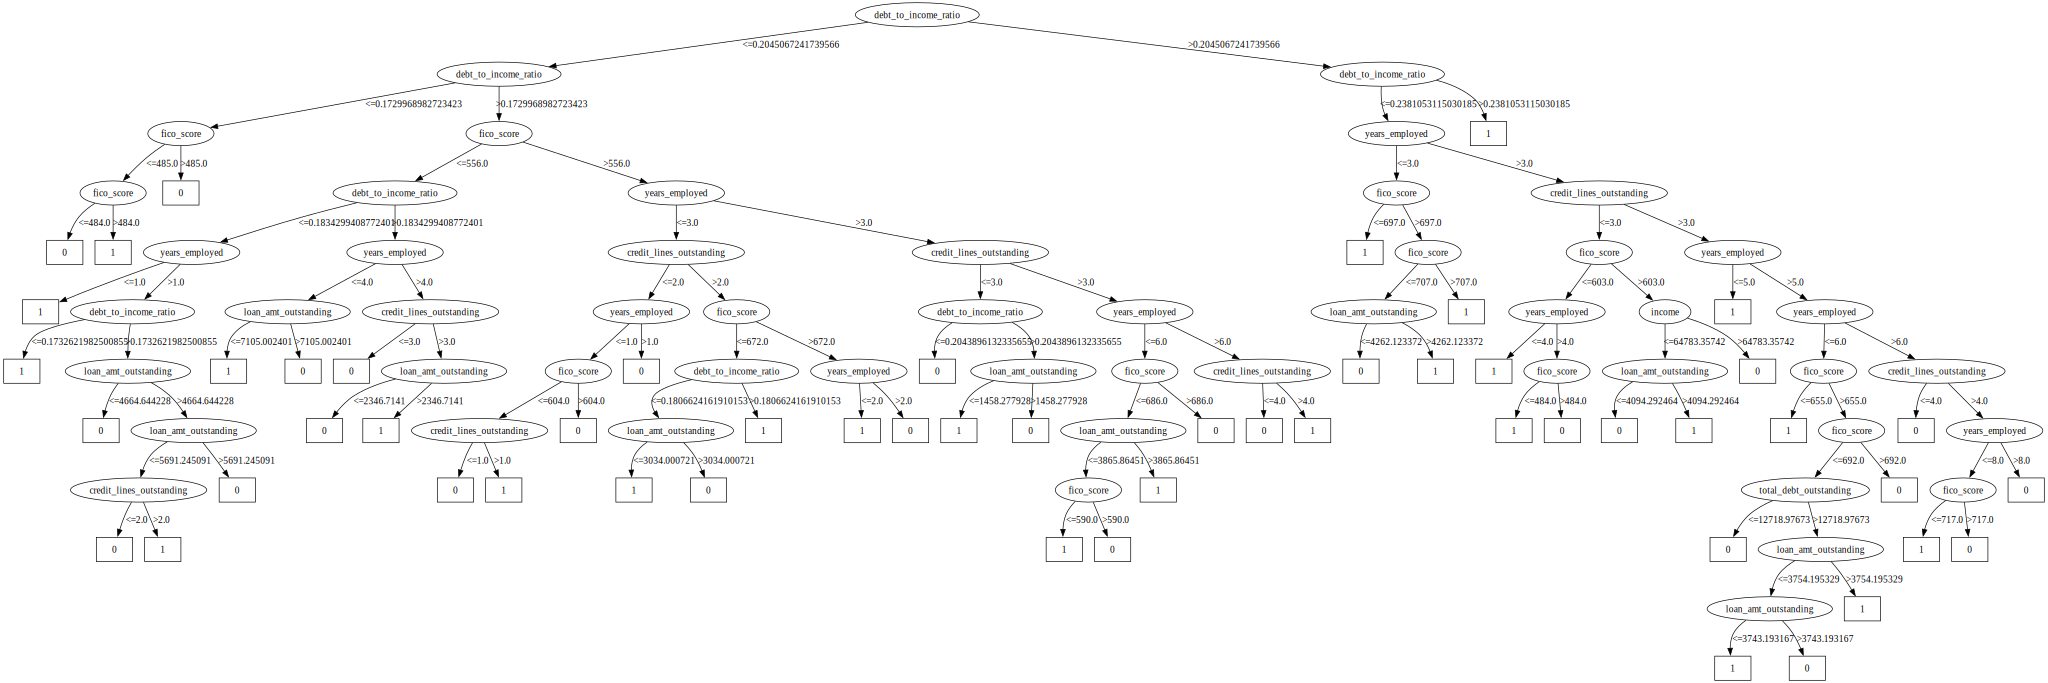

In [7]:
graphe_arbre

In [8]:
# ################### A COMPLETER 
arbre = classif.ClassifierArbreNumerique(dim, 0.0, X_noms)
tic= time.time()
(res_all, res_moy, res_sd) = ev.validation_croisee(arbre, (data_cv, label_cv), 10)
toc= time.time()
# ################### 
       
print("\nValidation croisée sur les iris avec comme seuil ",0.0)
print("Perf obtenues : ",res_all)
print(f'\nAccuracy moyenne: {res_moy:.3f}\técart type: {res_sd:.3f}')

Itération 0  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9928571428571429
Itération 1  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9971428571428571
Itération 2  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9985714285714286
Itération 3  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9885714285714285
Itération 4  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9942857142857143
Itération 5  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.99
Itération 6  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9914285714285714
Itération 7  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.99
Itération 8  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.9957142857142857
Itération 9  : taille base app.= 6300  taille base test= 700  Taux de bonne classif: 0.99

V

In [9]:
array = np.arange(0, 1.111, 0.101)
for i in range(len(array)) : 
  arbre = classif.ClassifierArbreNumerique(dim, array[i], X_noms)
  (res_all, res_moy, res_sd) = ev.validation_croisee(arbre, (data_cv, label_cv), 10, verbose=False)
  print("run ",i,": seuil d'entropie =",array[i],"        accyracy moyenne: ",res_moy,"       écart type: ",res_sd)


run  0 : seuil d'entropie = 0.0         accyracy moyenne:  0.9928571428571429        écart type:  0.003257644071711818
run  1 : seuil d'entropie = 0.101         accyracy moyenne:  0.9881428571428572        écart type:  0.004564727231048714
run  2 : seuil d'entropie = 0.202         accyracy moyenne:  0.9881428571428572        écart type:  0.004564727231048714
run  3 : seuil d'entropie = 0.30300000000000005         accyracy moyenne:  0.9822857142857144        écart type:  0.003948649988881512
run  4 : seuil d'entropie = 0.404         accyracy moyenne:  0.9822857142857144        écart type:  0.003948649988881512
run  5 : seuil d'entropie = 0.505         accyracy moyenne:  0.9822857142857144        écart type:  0.003948649988881512
run  6 : seuil d'entropie = 0.6060000000000001         accyracy moyenne:  0.9822857142857144        écart type:  0.003948649988881512
run  7 : seuil d'entropie = 0.7070000000000001         accyracy moyenne:  0.8407142857142859        écart type:  0.0721541716728

In [10]:
df_res = pd.DataFrame(columns=['Entropie', 'Accuracy'])

# ################### A COMPLETER 
entropie = []
acc = []
for i in range(len(array)) : 
  arbre = classif.ClassifierArbreNumerique(dim, array[i], X_noms)
  (res_all, res_moy, res_sd) = ev.validation_croisee(arbre, (data_cv, label_cv), 10, verbose=False)
  for j in range(len(res_all)) : 
    entropie.append(array[i])
    acc.append(res_all[j])

df_res["Entropie"] = entropie
df_res["Accuracy"] = acc
# ################### 
# Le datataframe obtenu :
df_res

,Entropie,Accuracy
0,0.00,0.992857
1,0.00,0.997143
2,0.00,0.998571
3,0.00,0.988571
4,0.00,0.994286
...,...,...
105,1.01,0.814286
106,1.01,0.797143
107,1.01,0.794286
108,1.01,0.805714


<Axes: xlabel='Entropie', ylabel='Accuracy'>

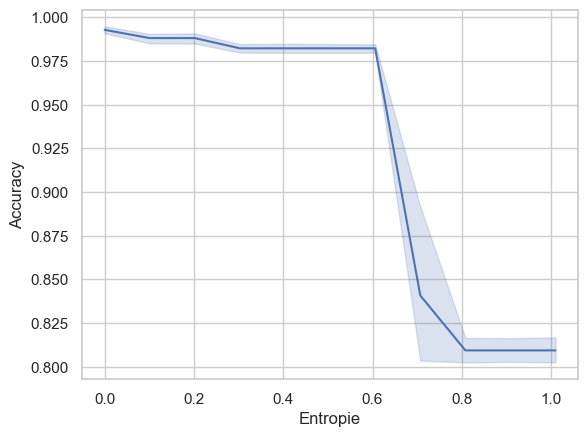

In [11]:
# Tracé avec lineplot
sns.set_theme(style="whitegrid")
sns.lineplot(x="Entropie", y="Accuracy", data=df_res)